# Содержание


- [Создание и обучение модели](#3)
    - [Подготовка данных для обучения](#31)
    - [Ансамблевые модели: беггинг](#335)

# Создание и обучение модели <a id="3"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("cleaned_dataset.csv", index_col=0)

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,0,35,170,75,90.0,1.0,1.0,1,1,120,...,126,92,17.1,1,1.0,21,35,40,1,1
1,0,30,180,80,89.0,0.9,1.2,1,1,130,...,148,121,15.8,1,0.9,20,36,27,3,0
2,0,40,165,75,91.0,1.2,1.5,1,1,120,...,74,104,15.8,1,0.9,47,32,68,1,0
3,0,50,175,80,91.0,1.5,1.2,1,1,145,...,104,106,17.6,1,1.1,29,34,18,1,0
4,0,50,165,60,80.0,1.0,1.2,1,1,138,...,117,104,13.8,1,0.8,19,12,25,1,0


На этом шаге происходит обучение модели. Обучение моделей машинного обучения происходит итерационно - пробуются различные модели, перебираются гиперпараметры, сравниваются значения выбранной метрики и выбирается лучшая комбинация.


## Подготовка данных для обучения <a id="31"></a>

Вначале нужно определить, на каких данных будет обучаться модель, а на каких тестироваться. **Традиционный подход** - это разделение исходного набора данных на 3 части (обучение, валидация и тестирование) с пропорции 60/20/20. В данном случае обучающая выборка используется для обучения модели, а валидация и тестирование для получения значения метрики без эффекта переобучения.

Однако существует и другой подход к разбиению данных - разделение на 2 части (обучение и тестирование) по правилу 80-20 (80% тренировочный, 20% тестовый). Зачастую данный метод применяется в тех случаях, когда отсутствует достаточное количество данных как в обучающем, так и в проверочном наборе.  

Перед тем как начать разбивать данные необходимо выделить из исходного набора данных целевую переменную (столбец `DRK_YN`) и сохранить её в отдельную переменную. Ниже приведён код разделения:

In [4]:
x = df.drop(columns=["DRK_YN"], axis=1)
y = df["DRK_YN"]

В ходе выполнения данной работы будет использован подход с разделением исходной выборки на 2 части с пропорцией 80-20, поскольку данный способ является самым популярным способом разбиения данных. Для того, чтобы разбить данные таким образом, существует специальный метод `train_test_split` в библиотеке `scikit-learn`.

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

### Ансамблевые модели: беггинг <a id="335"></a>

У каждой модели машинного обучения есть некоторый предел, до которого можно повышать точность, а дальше начинается переобучение и модель уже физически не может предсказать точнее, чем заложено в её природе. Эта природа определяется не только моделью, а связкой модели, т.е. математическим аппаратом и данными, которые эта модель пытается преобразовать. Однако точность работы одной конкретной модели не является пределом при решении задач машинного обучения.

Когда с этим столкнулись первые исследователи они обратились к математической статистике и выяснили, что если взять несколько однородных моделей и среднее их предсказание, но при этом модели обучены на немного разных выборках, то получится, что ошибка среднего равна $\sqrt{n}$, где $n$ это количество моделей. И ошибка выходит меньше за счёт того, что мы берём несколько одинаковых моделей. **Цель** ансамблевых методов - объединить различные классификаторы в метаклассификатор, который обладает лучшей эффективностью обобщения, чем каждый индивидуальный классификатор сам по себе.

В качестве примера ансамблей можно привести феномен "Мудрость толпы". В 1906 году Френсис Гальтон предлагал посетителям ярмарки угадать вес живого быка. Всего в эксперименте приняли участие около 800 человек. Каждый из участников должен был написать свой ответ на карточке и передать её Гальтону. Затем он сложил все ответы и разделил их на общее количество участников, чтобы получить среднее значение. Результат оказался удивительным: среднее значение всех ответов было ближе к истинному весу быка, чем большинство индивидуальных ответов.

Наиболее популярными видами ансамблирования являются:
1. **Бэггинг** (bagging: bootstrap aggregation) - принцип построения композиции, основанный на простом голосовании.
2. **Бустинг** - принцип построения композиции, основанный на последовательном обучении моделей, при котором модели исправляют ошибки друг у друга.
3. **Стекинг** - принцип, при котором происходит комбинация разнородных моделей для построения прогноза.

**Бэггинг** *(bootstrap aggregating)* - это метод, который позволяет уменьшить вариабельность модели, увеличивая её точность. Основная идея бэггинга заключается в том, чтобы обучить несколько одинаковых моделей на разных образцах. Затем результаты этих моделей объединяются для получения окончательного прогноза. Поскольку изначальное распределение выборки неизвестно, то модели получаются разными.

Один из самых известных примеров использования техники беггинга в алгоритмах машинного обучения - это **случайный лес**. Он представляет собой набор деревьев принятия решений. Основная идея случайного леса заключается в усреднении результатов множества деревьев, каждое из которых может иметь высокую дисперсию. Алгоритм случайного леса можно описать в виде следующих шагов:
1. Создаем случайную бутстрэп-выборку размером *n* (случайно выбрать *n* образцов из обучающего набора с возвращением);
2. Строим дерево принятия решений на основе этой выборки. В каждом узле:
    a) выбираем d признаков случайным образом без возможности возвращения;
    b) разделяем узел, используя признак, который обеспечивает наилучшее разделение согласно целевой функции, максимизирующей Information Gain;
3. Повторяем шаги 1 и 2 *k* раз.
4. Объединить прогнозы всех деревьев путем назначения метки класса по большинству голосов.

Далее перейдём к практической реализации и создадим модель случайного леса используя библиотеку `sklearn`. Также, проведём тюнинг гиперпараметров данной модели при помощи кросс-валидации. Для начала импортируем все необходимые библиотеки:

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
import chime
%load_ext chime 

Перекрёстная проверка (или же кросс-валидация) производится по следующей причине: 

Каждое дерево (по умолчанию из 100) строится на своей части выборки наборов параметров (max_features). Решение принимается путём голосования деревьев.

Например, 10 деревьев для одной строки исходных данных дали следующие классы и вероятности:

{1:0.5, 1:0.8, 2:0.9, 3:0.7, 5:0.5, 1:0.4, 2:0.5, 6:0.5, 3:0.4, 1:0.95}

По итогам голосования выбирается самый популярный класс, это 1 в данном случае.

Если в случайном лесу слишком много деревьев, то точность предсказания будет меньше, чем у одного, полностью обученного дерева. Число деревьев (estimators) должно соответствовать количеству классов в предсказании (class), размеру выборки (N) и числу разбиений (fold). Примерная формула: estimators = N / (20...100) / fold / class.

В данном случае N = 793048, fold = 5, class = 2 => estimators = 793...3965

Далее, также как и в предыдущий раз, создадим конвейер из двух составляющих: стандартизатора и самого классификатора.

In [7]:
# Создаем стандартизатор
standardizer = StandardScaler()

# Создаем классификатор
forest = RandomForestClassifier(n_jobs=-1, n_estimators=793)

# Создаём конвейер
pipe = Pipeline([("standardizer", standardizer), ("forest", forest)])

Диапазон тестирования параметров модели ограничен лишь вычислительной мощностью. Поэтому определим набор параметров, которые будут проверятся при кросс-валидации:

In [8]:
params = {
    "forest__max_depth": range(13, 15),
    "forest__max_features": range(10, 18),
    "forest__min_samples_leaf": range(17, 20),
}

Запустим процесс валидации и выведем оптимальные параметры для данного классификатора.

In [9]:
%%time
%%chime
forest_classifier = HalvingGridSearchCV(
    estimator=pipe, 
    param_grid=params,
    factor=3,
    cv=5, verbose=1, 
    n_jobs=-3, 
    scoring="roc_auc").fit(
    x_train, y_train
)

n_iterations: 4
n_required_iterations: 4
n_possible_iterations: 4
min_resources_: 29372
max_resources_: 793048
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 48
n_resources: 29372
Fitting 5 folds for each of 48 candidates, totalling 240 fits
----------
iter: 1
n_candidates: 16
n_resources: 88116
Fitting 5 folds for each of 16 candidates, totalling 80 fits
----------
iter: 2
n_candidates: 6
n_resources: 264348
Fitting 5 folds for each of 6 candidates, totalling 30 fits
----------
iter: 3
n_candidates: 2
n_resources: 793044
Fitting 5 folds for each of 2 candidates, totalling 10 fits
CPU times: total: 1h 23min 42s
Wall time: 1h 46min 32s


После завершения этапа обучения выведем наилучшую комбинацию параметров, а также наилучшую оценку, полученную на тренировочных данных.

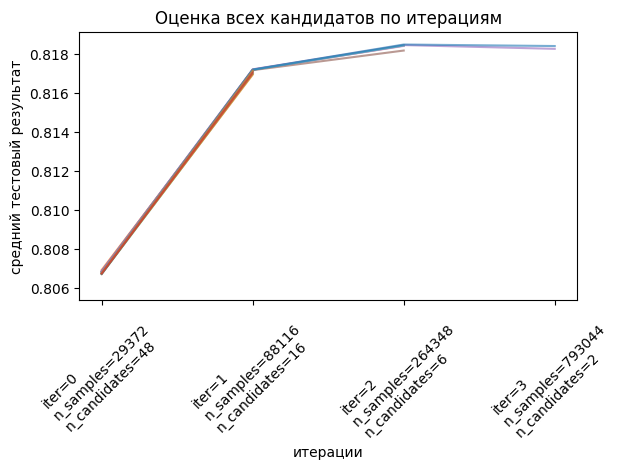

In [10]:
results = pd.DataFrame(forest_classifier.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter", columns="params_str", values="mean_test_score"
)
ax = mean_scores.plot(legend=False, alpha=0.6)
labels = [
    f"iter={i}\nn_samples={forest_classifier.n_resources_[i]}\nn_candidates={forest_classifier.n_candidates_[i]}"
    for i in range(forest_classifier.n_iterations_)
]
ax.set_xticks(range(forest_classifier.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Оценка всех кандидатов по итерациям")
ax.set_ylabel("средний тестовый результат")
ax.set_xlabel("итерации")
plt.tight_layout()
plt.show()

In [11]:
print(
    f"Оптимальные параметры: {forest_classifier.best_params_}\nНаилучшая оценка: {forest_classifier.best_score_:.2%}"
)

Оптимальные параметры: {'forest__max_depth': 14, 'forest__max_features': 12, 'forest__min_samples_leaf': 17}
Наилучшая оценка: 81.84%


Оптимальные параметры: {'forest__max_depth': 14, 'forest__max_features': 10, 'forest__min_samples_leaf': 17}
Наилучшая оценка: 81.81%